In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


In [5]:
data_df=pd.read_csv(r"C:\Users\ankit\Downloads\Sleep_health_and_lifestyle_dataset.csv")

In [6]:
data_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
print("The shape of the dataframe is:",data_df.shape)
print("The size of the dataframe is:",data_df.size)

The shape of the dataframe is: (374, 13)
The size of the dataframe is: 4862


In [8]:
data_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


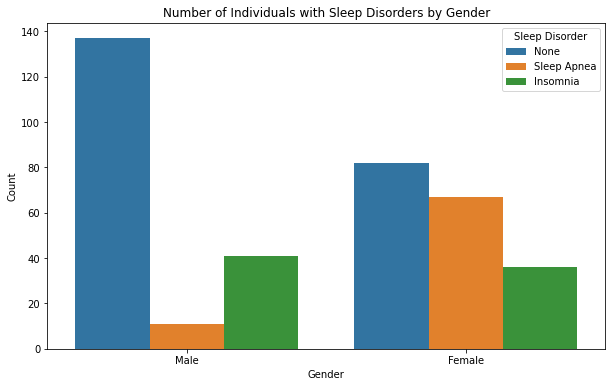

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_df, x='Gender', hue='Sleep Disorder')
plt.title('Number of Individuals with Sleep Disorders by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

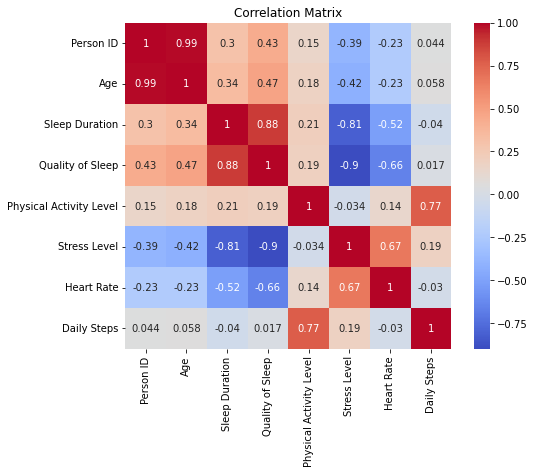

In [45]:

correlation_matrix = data_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

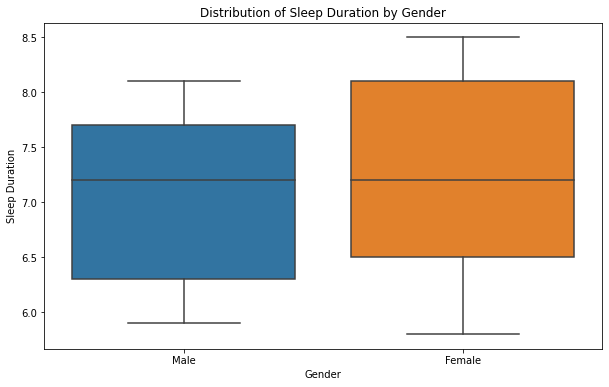

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_df, x='Gender', y='Sleep Duration')
plt.title('Distribution of Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.show()

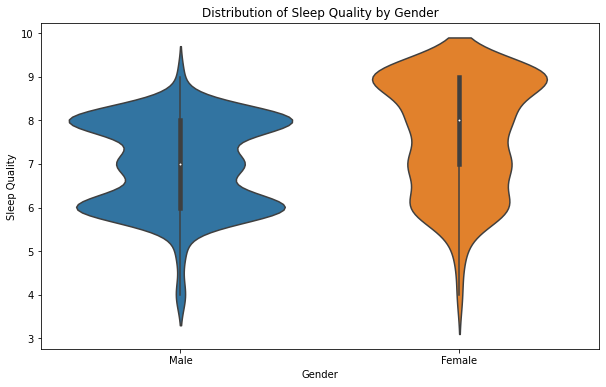

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_df, x='Gender', y='Quality of Sleep')
plt.title('Distribution of Sleep Quality by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.show()

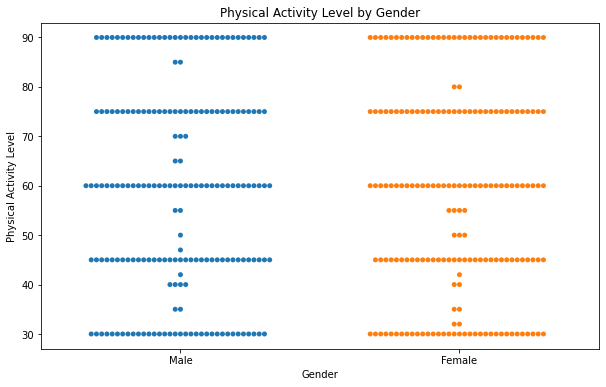

In [15]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data_df, x='Gender', y='Physical Activity Level')
plt.title('Physical Activity Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Physical Activity Level')
plt.show()

<Figure size 720x432 with 0 Axes>

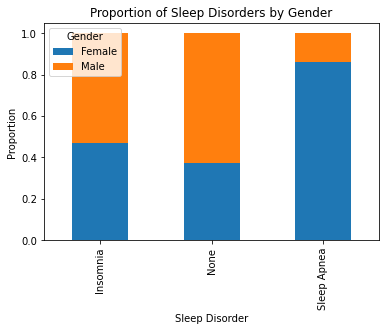

In [17]:
plt.figure(figsize=(10, 6))
ct = pd.crosstab(data_df['Sleep Disorder'], data_df['Gender'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Proportion of Sleep Disorders by Gender')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion')
plt.show()

In [19]:
print(data_df["Age"].min())
print(data_df["Age"].max())

27
59


In [22]:
age_ranges = [(0, 18), (19, 29), (30, 39), (40, 49), (50, 59), (60, 100)]
class_labels = ['0-18', '19-29', '30-39', '40-49', '50-59', '60+']

data_df['Age Class'] = pd.cut(data_df['Age'], bins=[r[0] for r in age_ranges] + [age_ranges[-1][1]],labels=class_labels, include_lowest=True)

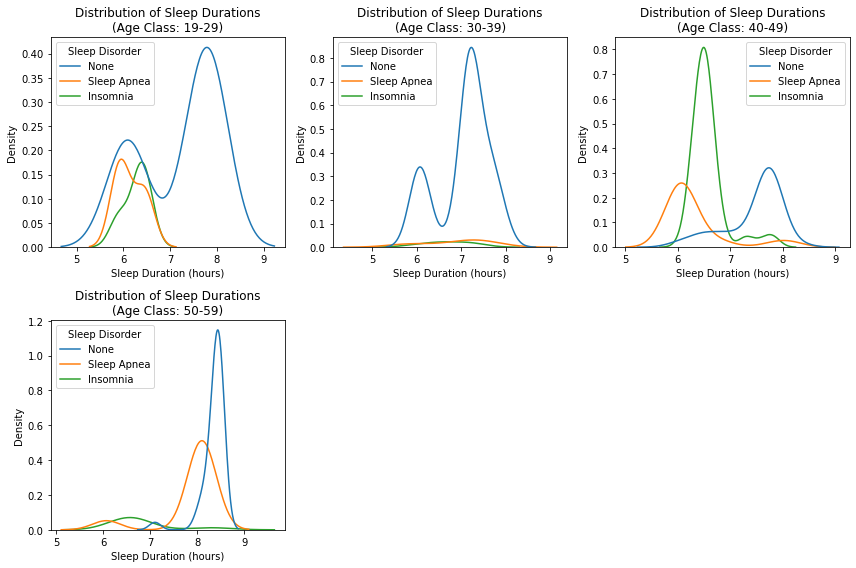

In [24]:
age_classes = ['19-29', '30-39', '40-49', '50-59']

plt.figure(figsize=(12, 8))
for i, age_class in enumerate(age_classes):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=data_df[data_df['Age Class'] == age_class], x='Sleep Duration',hue=data_df["Sleep Disorder"])
    plt.xlabel('Sleep Duration (hours)')
    plt.ylabel('Density')
    plt.title(f'Distribution of Sleep Durations\n(Age Class: {age_class})')

plt.tight_layout()
plt.show()

In [25]:
selected_columns = ['Quality of Sleep', 'Physical Activity Level']
data = data_df[selected_columns]

<Figure size 576x576 with 0 Axes>

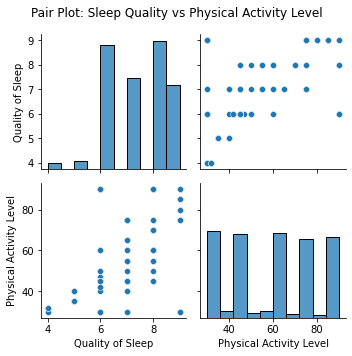

In [30]:
plt.figure(figsize=(8, 8))
sns.pairplot(data )
plt.suptitle('Pair Plot: Sleep Quality vs Physical Activity Level')
plt.tight_layout()
plt.show()

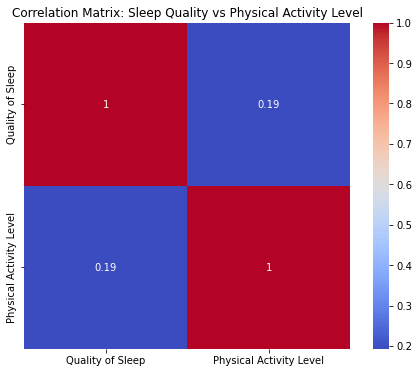

In [31]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix: Sleep Quality vs Physical Activity Level')
plt.show()

In [33]:
data_df["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

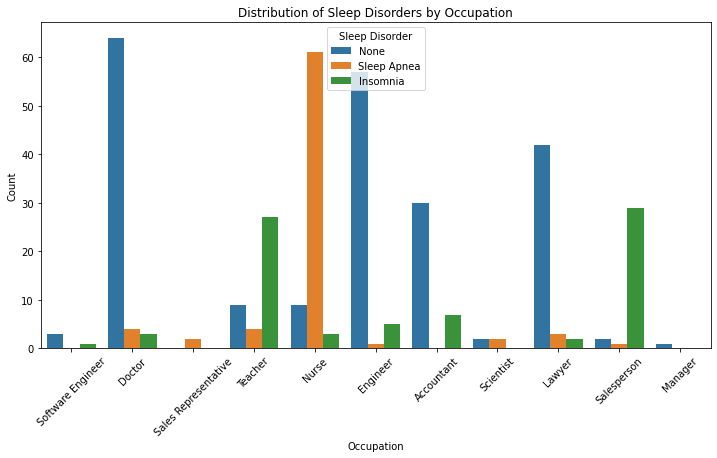

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_df, x='Occupation', hue='Sleep Disorder')
plt.title('Distribution of Sleep Disorders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sleep Disorder')
plt.show()

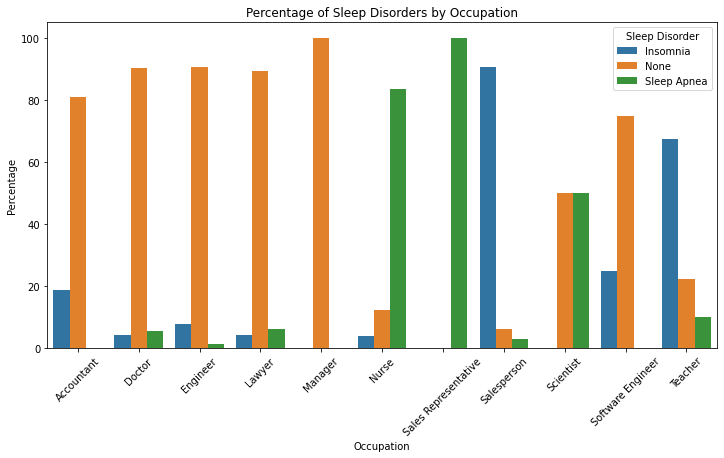

In [37]:
occup_disorder_perc = data_df.groupby(['Occupation', 'Sleep Disorder']).size() / data_df.groupby('Occupation').size() * 100
occup_disorder_perc = occup_disorder_perc.reset_index(name='Percentage')


plt.figure(figsize=(12, 6))
sns.barplot(data=occup_disorder_perc, x='Occupation', y='Percentage', hue='Sleep Disorder')
plt.title('Percentage of Sleep Disorders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Sleep Disorder')
plt.show()

In [40]:
average_heart_rate = data_df.groupby('Sleep Disorder')['Heart Rate'].mean().reset_index()

average_heart_rate_table = pd.DataFrame(average_heart_rate)
average_heart_rate_table.columns = ['Sleep Disorder', 'Average Heart Rate']
average_heart_rate_table = average_heart_rate_table.round({'Average Heart Rate': 2})
average_heart_rate_table = average_heart_rate_table.sort_values(by='Average Heart Rate', ascending=False)

table = tabulate(average_heart_rate_table, headers='keys', tablefmt='fancy_grid')
print(table)

╒════╤══════════════════╤══════════════════════╕
│    │ Sleep Disorder   │   Average Heart Rate │
╞════╪══════════════════╪══════════════════════╡
│  2 │ Sleep Apnea      │                73.09 │
├────┼──────────────────┼──────────────────────┤
│  0 │ Insomnia         │                70.47 │
├────┼──────────────────┼──────────────────────┤
│  1 │ None             │                69.02 │
╘════╧══════════════════╧══════════════════════╛


In [46]:
average_stress_rate = data_df.groupby('Sleep Disorder')['Stress Level'].mean().reset_index()

average_stress_rate_table = pd.DataFrame(average_stress_rate)
average_stress_rate_table.columns = ['Sleep Disorder', 'Average Stress Rate']
average_stress_rate_table = average_stress_rate_table.round({'Average Stress Rate': 2})
average_stress_rate_table = average_stress_rate_table.sort_values(by='Average Stress Rate', ascending=False)

table = tabulate(average_stress_rate_table, headers='keys', tablefmt='fancy_grid')
print(table)


╒════╤══════════════════╤═══════════════════════╕
│    │ Sleep Disorder   │   Average Stress Rate │
╞════╪══════════════════╪═══════════════════════╡
│  0 │ Insomnia         │                  5.87 │
├────┼──────────────────┼───────────────────────┤
│  2 │ Sleep Apnea      │                  5.67 │
├────┼──────────────────┼───────────────────────┤
│  1 │ None             │                  5.11 │
╘════╧══════════════════╧═══════════════════════╛


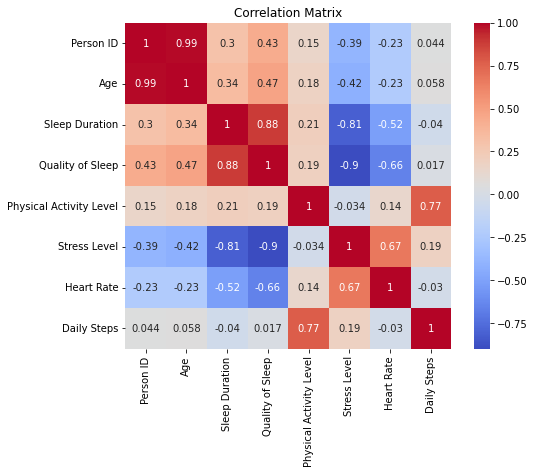